# Classification of customers in the credit-G data set

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from datetime import timedelta

from sklearn.model_selection import train_test_split,  KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, \
                  classification_report, accuracy_score,  precision_score, recall_score, f1_score

from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
import plotly.express as px

InteractiveShell.ast_node_interactivity = "all"
sns.set()
pd.set_option('precision', 3)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
credit = pd.read_csv("credit.csv", delimiter=',', na_values='?')
credit
credit.describe()
numerical_cols = ['duration', 'credit_amount','installment_commitment','residence_since','age',
                    'existing_credits',"num_dependents"]
categorical_cols = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude',
                    'other_payment_plans','housing','job','own_telephone','foreign_worker']
target =  'class'


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,20.903,3271.258,2.973,2.845,35.546,1.407,1.155
std,12.059,2822.737,1.119,1.104,11.375,0.578,0.362
min,4.000,250.000,1.000,1.000,19.000,1.000,1.000
25%,12.000,1365.500,2.000,2.000,27.000,1.000,1.000
50%,18.000,2319.500,3.000,3.000,33.000,1.000,1.000
75%,24.000,3972.250,4.000,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,4.000,75.000,4.000,2.000


## Visualization & Anlayse some features

In [312]:
credit_vis = credit 

In [317]:
credit_vis["age_group"]= np.nan
lst = [credit_vis]
for col in lst: 
    col.loc[(col['age'] > 18) & (col['age'] <= 29), 'age_group'] = 'Young'
    col.loc[(col['age'] > 29) & (col['age'] <= 40), 'age_group'] = 'Young Adults'
    col.loc[(col['age'] > 40) & (col['age'] <= 55), 'age_group'] = 'Senior'
    col.loc[(col['age'] > 55) , 'age_group'] = 'Elder'

In [329]:
purpose = credit_vis['age_group']
fig = px.histogram(credit_vis, x="age_group", color="class")
fig.update_layout(title={#'text':"Purpose",
#         'y':.95,
#         'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'})
plt.show()

In [328]:
purpose = credit_vis['checking_status']
fig = px.histogram(credit_vis, x="checking_status", color="class")
fig.update_layout(title={#'text':"Purpose",
#         'y':.95,
#         'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'})
plt.show()

## Data analysis

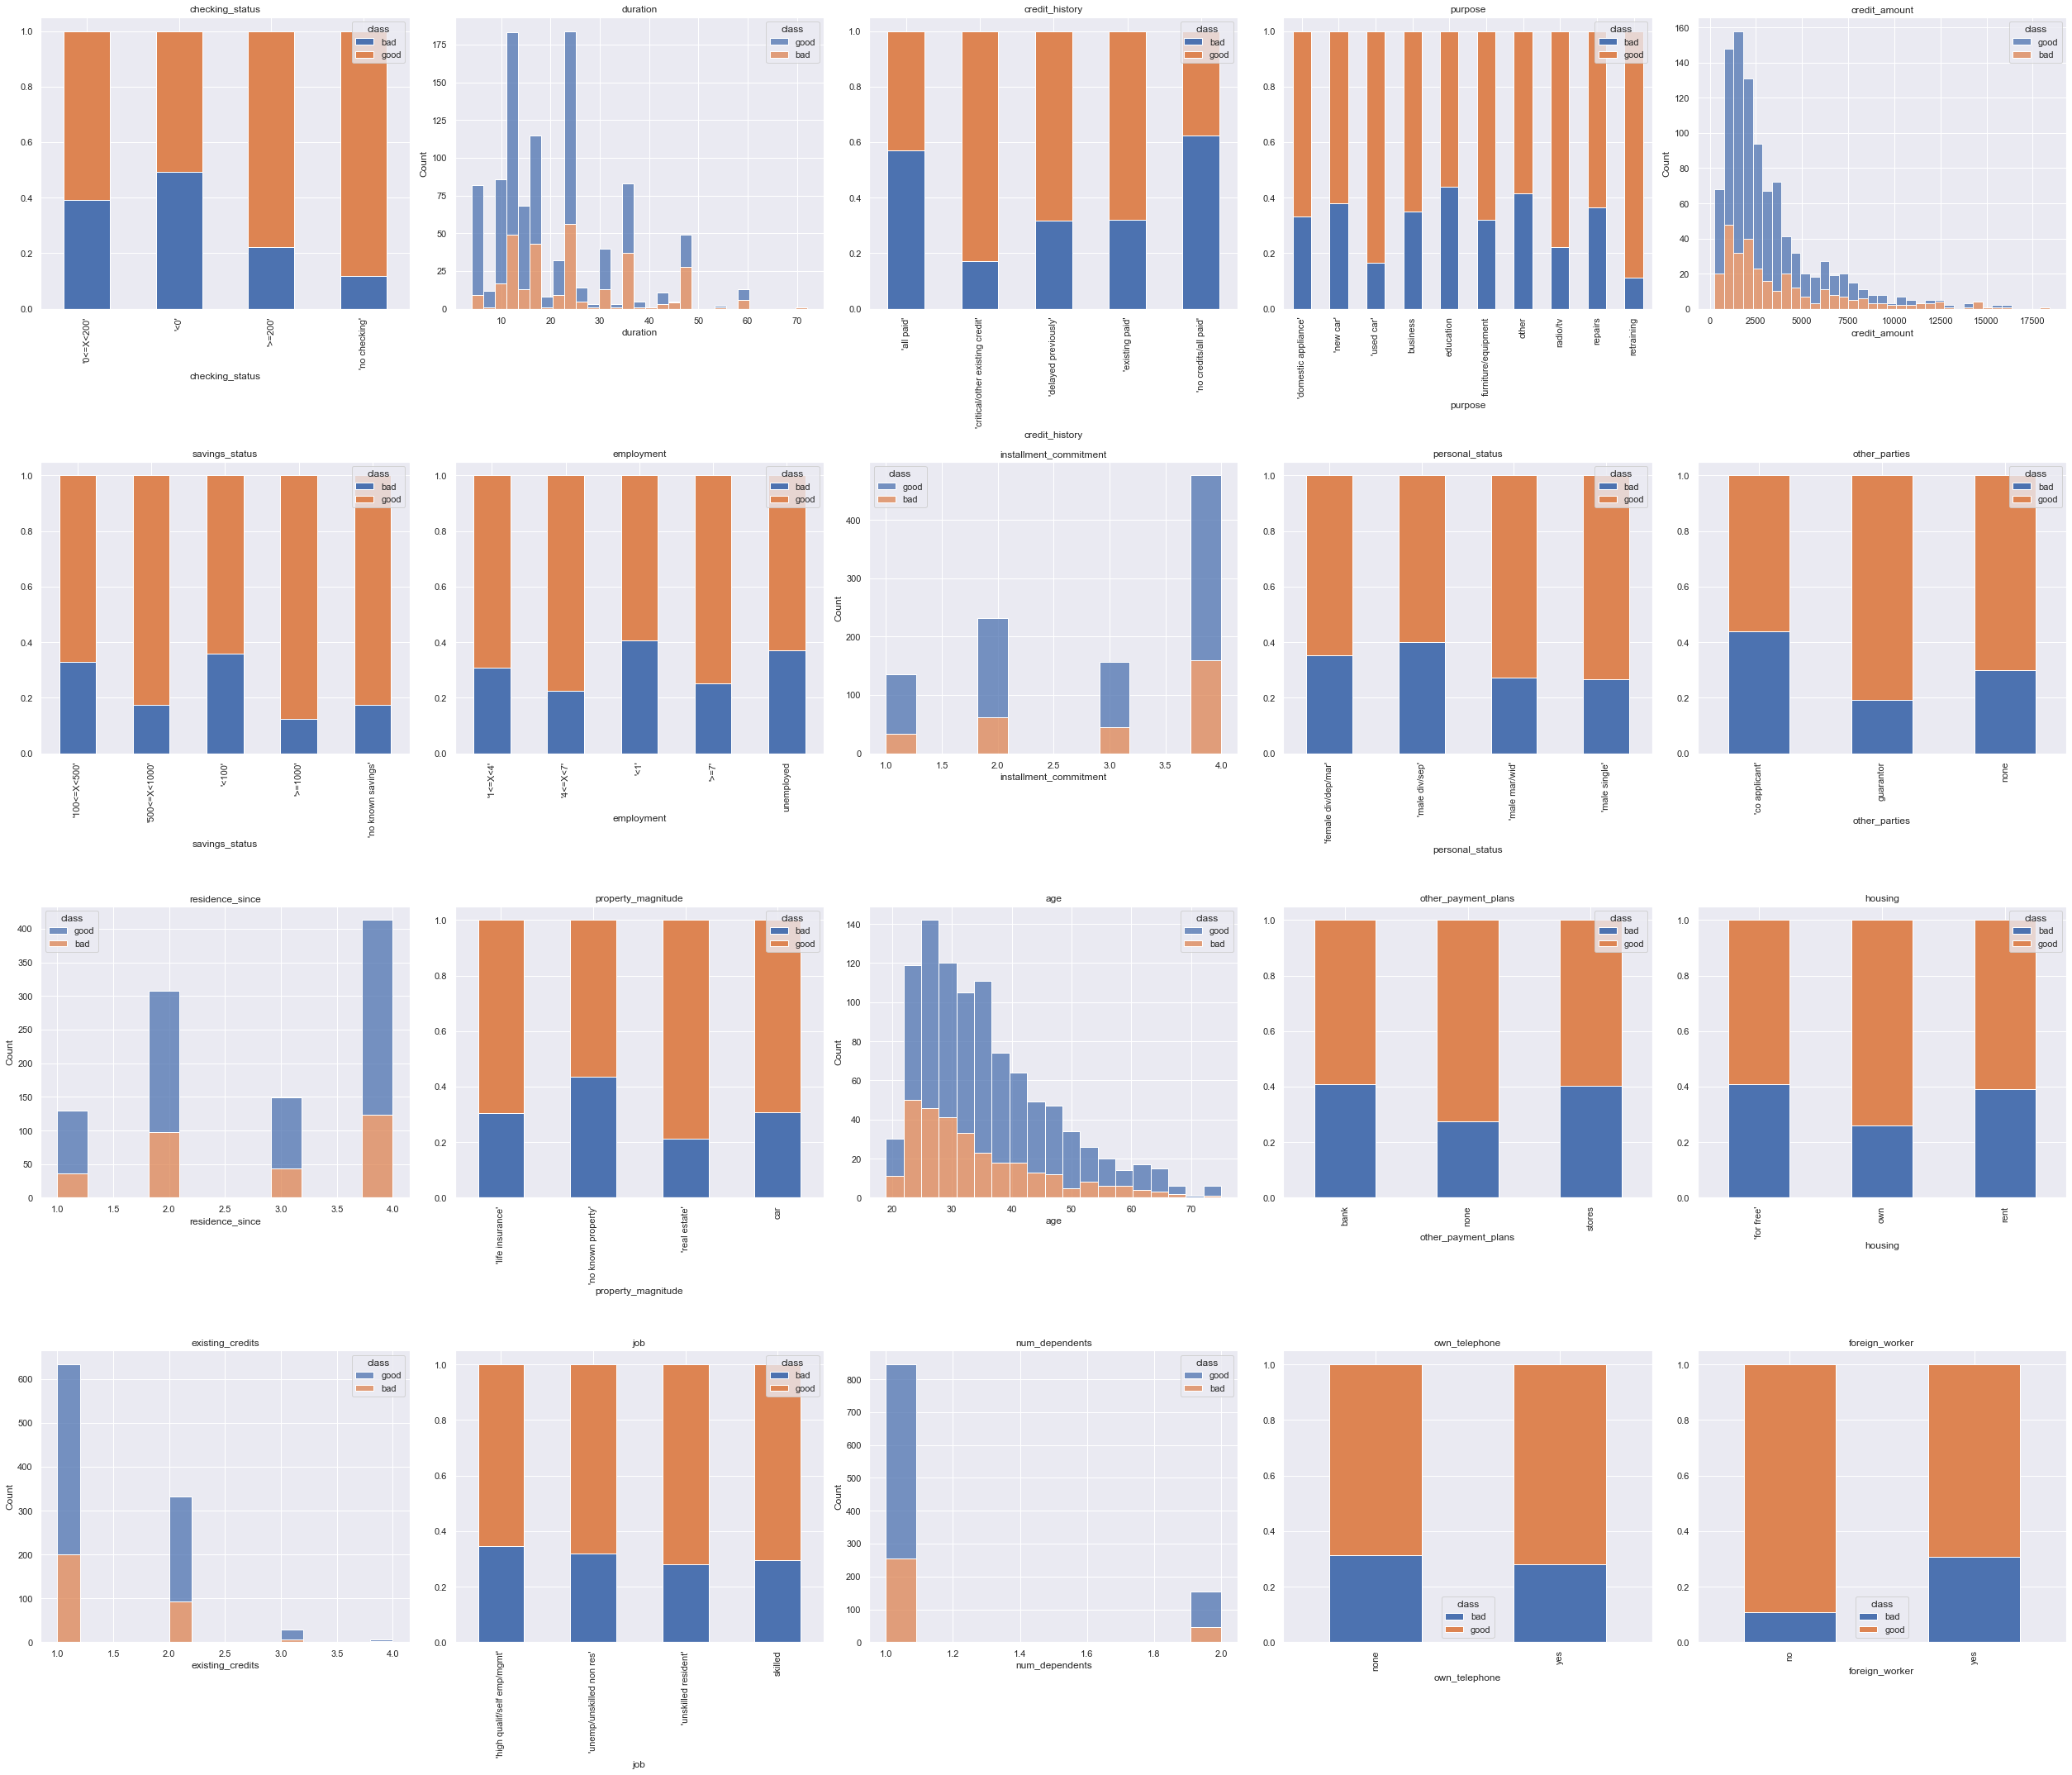

In [15]:
fig, axes = plt.subplots(4,5,figsize=(35,30))

for i, c in enumerate(credit.columns):
    if c == target:
        continue
    ax = axes.reshape(-1)[i]
    if credit[c].dtype.kind == 'O':
        ct = pd.crosstab(index=credit[c], columns=credit['class'], normalize='index')
        a = ct.plot(kind='bar', stacked=True,ax=ax)  
    else:
        b = sns.histplot(x=c,hue='class',data=credit, multiple='stack',ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

## Duration should be changed form skewed to normal 
From these plots we found that some of them are skewed and we can apply logarithm to these columns to change from skewed to normal
applying a logarithm to this column, as all values are positive. These variables are duration and credit_amount.

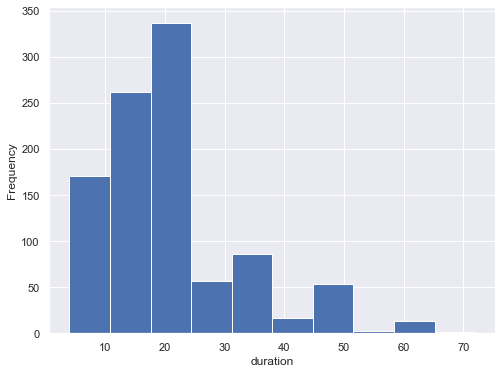

In [16]:
credit.duration.plot.hist(figsize=(8,6))
plt.xlabel('duration');

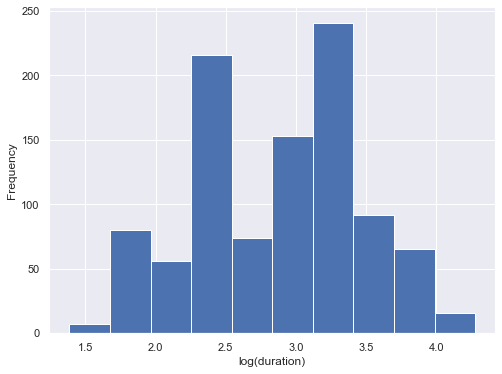

In [17]:
ax = credit.duration.apply('log').dropna().plot.hist(figsize=(8,6))
plt.xlabel('log(duration)');

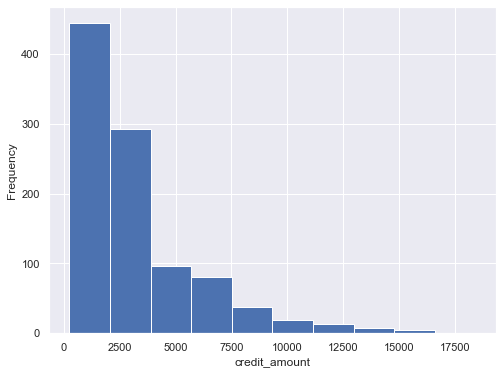

In [18]:
credit.credit_amount.plot.hist(figsize=(8,6))
plt.xlabel('credit_amount');

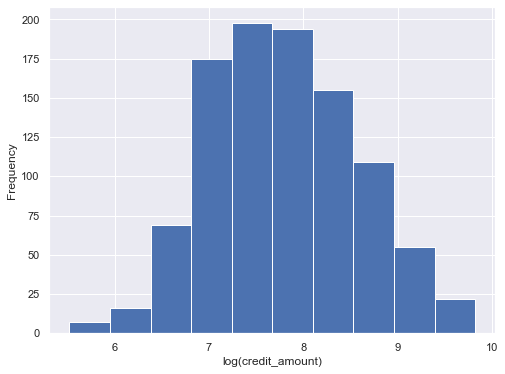

In [19]:
pd.set_option('use_inf_as_na', True)
ax = credit.credit_amount.apply('log').dropna().plot.hist(figsize=(8,6))
plt.xlabel('log(credit_amount)');

In [20]:
credit['duration'] = credit.duration.apply(lambda x: np.log(x+0.001)) 
credit['credit_amount'] = credit.credit_amount.apply(lambda x: np.log(x+0.001)) 

Changing categorical to numerical variables

In [25]:
change = {"foreign_worker": {"yes": 1, "no": 0},"own_telephone":{'none':0,'yes':1},
           "job":{'skilled':3, "'unskilled resident'":2, "'high qualif/self emp/mgmt'": 1,
            "'unemp/unskilled non res'":0}, "housing":{"own": 2, "rent":1,"'for free'":0},
           "other_payment_plans":{"none":0,"bank":1, "stores":2},"property_magnitude":{"car":3,"'real estate'":2,
            "'life insurance'":1,"'no known property'":0},"other_parties":{'none':0,'guarantor':1,"'co applicant'":2},
          "personal_status":{"'male single'":3, "'female div/dep/mar'":2,"'male mar/wid'":1, "'male div/sep'":0},
          "employment":{'unemployed':0,"'<1'":1,"'1<=X<4'":2,"'4<=X<7'":3,"'>=7'":4},"savings_status":
          {"'no known savings'":0,"'<100'":1,"'100<=X<500'":2,"'500<=X<1000'":3,"'>=1000'":4},"purpose":{'radio/tv': 0,
        "'new car'": 1, 'furniture/equipment': 2, "'used car'": 3, 'business': 4, 'education': 5, 'repairs': 6, 
          "'domestic appliance'": 7, 'other': 8, 'retraining': 9},"credit_history":{"'existing paid'": 0, 
          "'critical/other existing credit'": 1, "'delayed previously'": 2, "'all paid'": 3, "'no credits/all paid'": 4},
         "checking_status":{"'no checking'": 0, "'<0'": 1, "'0<=X<200'": 2, "'>=200'": 3},"class":{"good":1,"bad":0}}


In [279]:
credit_scaled = credit.replace(change)
credit_scaled.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,1.001,2.877,0.776,1.936,7.789,1.190,2.384,2.973,2.356,0.134,...,1.792,35.546,0.233,1.605,1.407,2.438,1.155,0.404,0.963,0.700
std,0.957,0.582,1.061,1.954,0.776,0.967,1.208,1.119,0.845,0.445,...,1.067,11.375,0.522,0.675,0.578,0.821,0.362,0.491,0.189,0.458
min,0.000,1.387,0.000,0.000,5.521,0.000,0.000,1.000,0.000,0.000,...,0.000,19.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
25%,0.000,2.485,0.000,0.000,7.219,1.000,2.000,2.000,2.000,0.000,...,1.000,27.000,0.000,1.000,1.000,2.000,1.000,0.000,1.000,0.000
50%,1.000,2.890,0.000,1.000,7.749,1.000,2.000,3.000,3.000,0.000,...,2.000,33.000,0.000,2.000,1.000,3.000,1.000,0.000,1.000,1.000
75%,2.000,3.178,1.000,3.000,8.287,1.000,4.000,4.000,3.000,0.000,...,3.000,42.000,0.000,2.000,2.000,3.000,1.000,1.000,1.000,1.000
max,3.000,4.277,4.000,9.000,9.821,4.000,4.000,4.000,3.000,2.000,...,3.000,75.000,2.000,2.000,4.000,3.000,2.000,1.000,1.000,1.000


## Tran/val/Test split

In [64]:
x = credit_scaled.loc[:,credit_scaled.columns != 'class']
y = credit_scaled['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify= y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify= y_train, random_state=42)

x_train.shape, y_train.shape
x_val.shape,y_val.shape
x_test.shape, y_test.shape


((640, 20), (640,))

((160, 20), (160,))

((200, 20), (200,))

## Scaling data

In [43]:
def preprocessing(X, y, scaler=None):    
    if scaler is None: 
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    else: 
        X = scaler.transform(X) 
    return X, y, scaler

x_train, y_train, scaler = preprocessing(x_train,y_train)
x_test, y_test, _ = preprocessing(x_test,y_test,scaler)

### Define metrics

In [75]:
def compute_metrics(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    precison_macro =precision_score(y_true,y_pred,  average='macro')
    f1_score_1 = f1_score(y_true,y_pred,average='binary',pos_label=1)
    f1_score_0 = f1_score(y_true,y_pred,average='binary',pos_label=0)
    f1_score_macro = f1_score(y_true,y_pred,average='macro')
    recall_class_1 =recall_score(y_true,y_pred, pos_label=1)
    recall_class_0 =recall_score(y_true,y_pred, pos_label=0)
    
    return [accuracy,precison_macro,f1_score_1,f1_score_0,f1_score_macro,recall_class_1,recall_class_0]
    
result_models = pd.DataFrame(columns=['Accuracy','Precison_macro','F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)',
                                     'Recall_class_1','Recall_class_0'])


### Define confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix, \
                  classification_report, accuracy_score,  precision_score, recall_score, f1_score
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

## Geneartive Models

### LDA before oversampling

In [82]:
lda_credit = LinearDiscriminantAnalysis()
lda_credit.fit(x_train, y_train)
y_pred_lda = lda_credit.predict(x_val)

LinearDiscriminantAnalysis()

In [83]:
confusion(pd.Series(y_val),pd.Series(y_pred_lda))

predicted,0,1
target,,
0,14,34
1,16,96


In [84]:
result_models.loc['LDA_before',:] = compute_metrics(y_val, y_pred_lda)
result_models

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292


### LDA after oversampling

Using SMOTE to balance dataset

In [85]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12,sampling_strategy = "auto")

x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)
x_train_balanced.shape
print("Before balancing:",Counter(y_train))
print("After balancing:",Counter(y_train_balanced))
x_val.shape

(896, 20)

Before balancing: Counter({1: 448, 0: 192})
After balancing: Counter({0: 448, 1: 448})


(160, 20)

In [90]:
lda_credit_balanc = LinearDiscriminantAnalysis()
lda_credit_balanc.fit(x_train_balanced, y_train_balanced)
y_pred_lda_balanc = lda_credit_balanc.predict(x_val)

LinearDiscriminantAnalysis()

In [91]:
confusion(pd.Series(y_val), pd.Series(y_pred_lda_balanc))

predicted,0,1
target,,
0,25,23
1,33,79


In [92]:
result_models.loc['LDA_after',:] = compute_metrics(y_val, y_pred_lda_balanc)
result_models

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521


### QDA before oversampling

In [124]:
index= pd.MultiIndex.from_arrays([[], []], names=('model', 'reg'));
results_qda = pd.DataFrame(index=index, columns=['Accuracy','Precison_macro','F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)',
                                     'Recall_class_1','Recall_class_0']);

regularization_parameters = [0, 0.01, 0.1, 0.5, 1, 5, 10];

for reg in regularization_parameters:
    qda_model = QuadraticDiscriminantAnalysis(reg_param=reg);
    qda_model = qda_model.fit(x_train,y_train);
    y_pred_qda = qda_model.predict(x_val);
    results_qda.loc[('QDA',reg), :] = compute_metrics(y_val, y_pred_qda);

results_qda.sort_values(by='F1-score (class 0)', ascending=False)


Accuracy Precison_macro F1-score (class 1) F1-score (class 0)  \
model reg                                                                   
QDA   1.00     0.613          0.618              0.674              0.523   
      0.00     0.669          0.618              0.756              0.485   
      5.00       0.3           0.15                0.0              0.462   
      10.00      0.3           0.15                0.0              0.462   
      0.01     0.662          0.602              0.757              0.449   
      0.10      0.65          0.571              0.757              0.378   
      0.50      0.65          0.562              0.761              0.349   

            F1-score (macro avg) Recall_class_1 Recall_class_0  
model reg                                                       
QDA   1.00                 0.598          0.571          0.708  
      0.00                 0.621          0.732          0.521  
      5.00                 0.231            0.0            1.0  
      10.00                0.231            0.0            1.0  
      0.01                 0.603           0.75          0.458  
      0.10                 0.567          0.777          0.354  
      0.50                 0.555          0.795          0.312

In [133]:
qda_best = QuadraticDiscriminantAnalysis(reg_param=1)
qda_best.fit(x_train,y_train)
y_pred_qda_best = qda_best.predict(x_val);


In [134]:
result_models.loc['QDA_before',:] = compute_metrics(y_val, y_pred_qda_best)
result_models

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
QDA_after,0.3,0.15,0.0,0.462,0.231,0.0,1.0


### QDA after oversampling

In [135]:
qda_best = QuadraticDiscriminantAnalysis(reg_param=1)
qda_model_balanc = qda_best.fit(x_train_balanced, y_train_balanced)
y_pred_qda_best_balanc = qda_model_balanc.predict(x_val);

In [137]:
result_models.loc['QDA_after',:] = compute_metrics(y_val, y_pred_qda_best_balanc)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292


In [211]:
confusion(pd.Series(y_val), pd.Series(y_pred_qda_best))

predicted,0,1
target,,
0,34,14
1,48,64


### Gaussian Naive Bayes befor oversampling

In [144]:
gauss_nb = GaussianNB()
gauss_nb.fit(x_train,y_train)
y_pred_nb = gauss_nb.predict(x_val)

GaussianNB()

In [145]:
result_models.loc['Gauss_nb',:] = compute_metrics(y_val, y_pred_nb)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292


### Gaussian Naive Bayes after oversampling

In [241]:
gauss_nb_balanc= gauss_nb.fit(x_train_balanced, y_train_balanced)
y_pred_nb_balanc = gauss_nb_balanc.predict(x_val)

In [242]:
result_models.loc['Gauss_nb_balanc',:] = compute_metrics(y_val, y_pred_nb_balanc)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
RF-best,0.719,0.666,0.798,0.536,0.667,0.795,0.542
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
RF-balance,0.769,0.756,0.851,0.479,0.665,0.946,0.354
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
DT-default,0.669,0.607,0.762,0.454,0.608,0.759,0.458
DT-best,0.7,0.631,0.795,0.442,0.618,0.83,0.396


In [243]:
confusion(pd.Series(y_val), pd.Series(y_pred_nb_balanc))

predicted,0,1
target,,
0,34,14
1,47,65


## Discriminative classifiers 

### KNN

In [166]:
index_defin = pd.MultiIndex.from_arrays([[], []], names=('method', 'k'))
df_test = pd.DataFrame(index = index_defin, columns = ['Accuracy','Precison_macro','F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)',
                                     'Recall_class_1','Recall_class_0'])
k_knn = range(1,30,2)
for k in k_knn:
    knn_method = KNeighborsClassifier(n_neighbors = k)
    knn = knn_method.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_val)
    df_test.loc[("knn",k),:] = compute_metrics(y_val,y_pred_knn)
df_test.sort_values("F1-score (class 0)",ascending = False)

Accuracy Precison_macro F1-score (class 1) F1-score (class 0)  \
method k                                                                  
knn    3     0.675          0.597              0.778              0.395   
       1       0.6          0.539              0.706              0.373   
       5     0.675          0.586              0.783               0.35   
       11      0.7          0.618              0.806              0.333   
       7     0.688          0.596              0.797              0.324   
       13    0.713          0.644              0.819              0.303   
       9     0.681          0.579              0.795              0.282   
       27    0.731          0.729              0.835              0.271   
       29    0.725          0.713              0.832              0.241   
       23    0.719          0.681              0.828              0.237   
       19      0.7          0.608              0.815                0.2   
       21      0.7          0.608              0.815                0.2   
       25    0.706          0.635              0.821              0.175   
       15    0.688          0.563              0.808              0.167   
       17    0.681          0.546              0.803              0.164   

          F1-score (macro avg) Recall_class_1 Recall_class_0  
method k                                                      
knn    3                 0.587          0.812          0.354  
       1                 0.539          0.688          0.396  
       5                 0.567          0.839          0.292  
       11                 0.57          0.893           0.25  
       7                 0.561          0.875           0.25  
       13                0.561          0.929          0.208  
       9                 0.538          0.884          0.208  
       27                0.553          0.973          0.167  
       29                0.537          0.973          0.146  
       23                0.532          0.964          0.146  
       19                0.508          0.946          0.125  
       21                0.508          0.946          0.125  
       25                0.498          0.964          0.104  
       15                0.487          0.938          0.104  
       17                0.484          0.929          0.104

In [171]:
knn_method_best = KNeighborsClassifier(n_neighbors = 3)
knn_method_best.fit(x_train, y_train)
y_pred_knn = knn_method_best.predict(x_val)

KNeighborsClassifier(n_neighbors=3)

In [173]:
result_models.loc['knn_best',:] = compute_metrics(y_val, y_pred_knn)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
knn_best,0.675,0.597,0.778,0.395,0.587,0.812,0.354
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292


### Logestic Regression

In [181]:
index_defin = pd.MultiIndex.from_arrays([[], []], names=('method', 'c'))
df_test_lr = pd.DataFrame(index = index_defin, columns = ['Accuracy','Precison_macro','F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)',
                                     'Recall_class_1','Recall_class_0']);

lambdas = [ 0.0001, 0.001, 0.01, 0.1, 1, 10]

for l in lambdas: 
    C = 1/l
    logreg = LogisticRegression(C=C);
    logreg = logreg.fit(x_train,y_train);
    y_pred_lr = logreg.predict(x_val);
    df_test_lr.loc[('LogReg', C), :] = compute_metrics(y_val, y_pred_lr);

df_test_lr.sort_values("F1-score (class 0)",ascending = False)


Accuracy Precison_macro F1-score (class 1) F1-score (class 0)  \
method c                                                                       
LogReg 1000.0     0.688          0.603              0.793              0.359   
       100.0      0.688          0.603              0.793              0.359   
       10.0       0.688          0.603              0.793              0.359   
       1.0        0.688          0.603              0.793              0.359   
       10000.0    0.688            0.6              0.795              0.342   
       0.1          0.7          0.618              0.806              0.333   

               F1-score (macro avg) Recall_class_1 Recall_class_0  
method c                                                           
LogReg 1000.0                 0.576          0.857          0.292  
       100.0                  0.576          0.857          0.292  
       10.0                   0.576          0.857          0.292  
       1.0                    0.576          0.857          0.292  
       10000.0                0.569          0.866          0.271  
       0.1                     0.57          0.893           0.25

In [186]:
logreg_best = LogisticRegression(C=1000);
logreg_best.fit(x_train,y_train);
y_pred_lr_best = logreg_best.predict(x_val);

In [187]:
result_models.loc['Logestic_reg',:] = compute_metrics(y_val, y_pred_lr_best)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
knn_best,0.675,0.597,0.778,0.395,0.587,0.812,0.354
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292
Logestic_reg,0.688,0.603,0.793,0.359,0.576,0.857,0.292


# Decision tree

In [188]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

In [189]:
print("Tree depth:{}\nNodes:{}".format(tree_model.tree_.max_depth, tree_model.tree_.node_count))

Tree depth:15
Nodes:265


In [194]:
y_pred_dt_train = tree_model.predict(x_train)
confusion(pd.Series(y_train), pd.Series(y_pred_dt_train))

predicted,0,1
target,,
0,192,0
1,0,448


In [199]:
y_pred_dt = tree_model.predict(x_val)
confusion(pd.Series(y_val), pd.Series(y_pred_dt))

result_models.loc['DT-default',:] = compute_metrics(y_val, y_pred_dt)
result_models.sort_values(by='F1-score (class 0)', ascending=False)


,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
DT-default,0.669,0.607,0.762,0.454,0.608,0.759,0.458
knn_best,0.675,0.597,0.778,0.395,0.587,0.812,0.354
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292
Logestic_reg,0.688,0.603,0.793,0.359,0.576,0.857,0.292


predicted,0,1
target,,
0,22,26
1,27,85


In [200]:
print(classification_report(y_val,y_pred_dt,target_names=['bad', 'good'],))

              precision    recall  f1-score   support

         bad       0.45      0.46      0.45        48
        good       0.77      0.76      0.76       112

    accuracy                           0.67       160
   macro avg       0.61      0.61      0.61       160
weighted avg       0.67      0.67      0.67       160



### Tune hyperparameters-Desision tree

In [201]:
criterion = ['gini', 'entropy']

max_dephts = [4,6,8,10,12,14,16] 
min_samples_split = range(2,16,2)
min_samples_leaf = range(2,16,2)
max_features = ['auto', 'sqrt', 'log2', None]

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

init_time = time()
model_tree = DecisionTreeClassifier()

f1_class_0_scorer = make_scorer(f1_score, pos_label=0)
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)

scoring_dict = {
    'f1_mac': 'f1_macro',
    'f1_class_0': f1_class_0_scorer,
    'f1_class_1': f1_class_1_scorer,
    'acc': 'accuracy'
}

trc = GridSearchCV(estimator=model_tree,
                   scoring=scoring_dict,
                   param_grid={
                       'criterion': criterion,
                       'max_depth': max_dephts,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'max_features': max_features
                   },
                   cv=10,
                   return_train_score=False,
                   refit='f1_mac')

model_dt_10CV = trc.fit(x_train, y_train)
print(timedelta(seconds=(time() - init_time)))

0:05:03.844047


In [212]:
scoring_cols = [
    'param_criterion', 'param_max_depth', 'param_max_features',
    'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_f1_mac',
    'mean_test_f1_class_0', 'mean_test_f1_class_1', 'mean_test_acc'
]

pd.DataFrame(model_dt_10CV.cv_results_).sort_values(by='mean_test_f1_class_0',ascending=False)[scoring_cols].head()

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_f1_mac,mean_test_f1_class_0,mean_test_f1_class_1,mean_test_acc
2470,entropy,14,log2,6,14,0.670,0.532,0.808,0.728
2412,entropy,14,sqrt,4,10,0.660,0.527,0.792,0.713
851,gini,12,sqrt,6,10,0.666,0.521,0.811,0.730
1277,gini,16,log2,2,8,0.645,0.520,0.771,0.691
2646,entropy,16,log2,2,2,0.647,0.517,0.776,0.695


In [213]:
best_params = model_dt_10CV.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 14}

In [217]:
y_pred_dt_best = model_dt_10CV.predict(x_val)
confusion(pd.Series(y_val),pd.Series(y_pred_dt_best))

result_models.loc['DT-best',:] = compute_metrics(y_val, y_pred_dt_best)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

predicted,0,1
target,,
0,19,29
1,19,93


,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
DT-default,0.669,0.607,0.762,0.454,0.608,0.759,0.458
DT-best,0.7,0.631,0.795,0.442,0.618,0.83,0.396
knn_best,0.675,0.597,0.778,0.395,0.587,0.812,0.354
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292
Logestic_reg,0.688,0.603,0.793,0.359,0.576,0.857,0.292


### Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,StackingClassifier,ExtraTreesClassifier
randomforest_model = RandomForestClassifier(oob_score= True)
randomforest_model.fit(x_train,y_train)


RandomForestClassifier(oob_score=True)

In [219]:
y_pred_rf = randomforest_model.predict(x_val)
confusion(pd.Series(y_val),pd.Series(y_pred_rf))
print('Validation Accuracy:{}'.format(randomforest_model.score(x_val, y_val)))

predicted,0,1
target,,
0,19,29
1,12,100


Validation Accuracy:0.74375


In [220]:
print(classification_report(y_val,y_pred_rf, target_names = ["bad", "good"],))

              precision    recall  f1-score   support

         bad       0.61      0.40      0.48        48
        good       0.78      0.89      0.83       112

    accuracy                           0.74       160
   macro avg       0.69      0.64      0.66       160
weighted avg       0.73      0.74      0.73       160



In [222]:
result_models.loc['RF-default', :] = compute_metrics(y_val, y_pred_rf)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
DT-default,0.669,0.607,0.762,0.454,0.608,0.759,0.458
DT-best,0.7,0.631,0.795,0.442,0.618,0.83,0.396
knn_best,0.675,0.597,0.778,0.395,0.587,0.812,0.354
LDA_before,0.688,0.603,0.793,0.359,0.576,0.857,0.292


### Balanced Random Forest

In [223]:
randomforest_model_bln = RandomForestClassifier(n_estimators= 100, oob_score= True,
                                                class_weight = 'balanced').fit(x_train,y_train)
y_pred_rf_bln = randomforest_model_bln.predict(x_val)
confusion(pd.Series(y_val),pd.Series(y_pred_rf_bln))
print('OOB accuracy=', randomforest_model_bln.oob_score_)

predicted,0,1
target,,
0,17,31
1,6,106


OOB accuracy= 0.7609375


In [224]:
print(classification_report(y_val,y_pred_rf_bln,target_names = ["bad", "good"],))

              precision    recall  f1-score   support

         bad       0.74      0.35      0.48        48
        good       0.77      0.95      0.85       112

    accuracy                           0.77       160
   macro avg       0.76      0.65      0.67       160
weighted avg       0.76      0.77      0.74       160



In [226]:
result_models.loc['RF-balance', :] = compute_metrics(y_val, y_pred_rf_bln)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
RF-balance,0.769,0.756,0.851,0.479,0.665,0.946,0.354
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
DT-default,0.669,0.607,0.762,0.454,0.608,0.759,0.458
DT-best,0.7,0.631,0.795,0.442,0.618,0.83,0.396
knn_best,0.675,0.597,0.778,0.395,0.587,0.812,0.354


## Tuning Randomforest

In [227]:
init_time = time()
rf_model = RandomForestClassifier()


ntrees = [200,500]
max_depth = [10,100,None]
min_samples_split = [4,6]
min_samples_leaf = [4,6]
balance = [None, 'balanced', 'balanced_subsample']

trc = GridSearchCV(estimator=rf_model,
                   scoring=scoring_dict,
                   param_grid={
                       'n_estimators': ntrees,
                       'max_depth':max_depth,
                       'min_samples_split':min_samples_split,
                       'min_samples_leaf':min_samples_leaf, 
                       'class_weight':balance
                   },
                   cv=10,
                   return_train_score=False,
                   refit=False,
                   n_jobs=-1)

model_rf_10CV = trc.fit(x_train, y_train)
print(timedelta(seconds=(time() - init_time)))

0:05:27.451974


In [228]:
scoring_cols = [
    'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
    'mean_test_f1_mac', 'mean_test_f1_class_0', 'mean_test_f1_class_1',
    'mean_test_acc']
pd.DataFrame(model_rf_10CV.cv_results_).sort_values(by='mean_test_f1_class_0', ascending=False)[scoring_cols].head()


,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_f1_mac,mean_test_f1_class_0,mean_test_f1_class_1,mean_test_acc
52,10,6,4,0.705,0.597,0.813,0.745
29,10,6,4,0.705,0.590,0.819,0.750
37,100,6,4,0.704,0.589,0.820,0.750
69,None,6,4,0.704,0.589,0.820,0.750
39,100,6,6,0.700,0.585,0.814,0.744


In [229]:
best_params = pd.DataFrame(model_rf_10CV.cv_results_).sort_values(by='mean_test_f1_class_0',ascending=False)[['params']].iloc[0,0]
best_params


{'class_weight': 'balanced_subsample',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 200}

In [231]:
randomforest_model_best = RandomForestClassifier(**best_params)
randomforest_model_best.fit(x_train, y_train)
y_pred_rf_best = randomforest_model_best.predict(x_val)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=6, min_samples_split=4,
                       n_estimators=200)

In [238]:
result_models.loc['RF-best', :] = compute_metrics(y_val, y_pred_rf_best)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
RF-best,0.719,0.666,0.798,0.536,0.667,0.795,0.542
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
RF-balance,0.769,0.756,0.851,0.479,0.665,0.946,0.354
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
DT-default,0.669,0.607,0.762,0.454,0.608,0.759,0.458
DT-best,0.7,0.631,0.795,0.442,0.618,0.83,0.396


In [245]:
confusion(pd.Series(y_val),pd.Series(y_pred_rf_best))

predicted,0,1
target,,
0,26,22
1,23,89


In [269]:
print(classification_report(y_val,y_pred_rf_best,target_names = ["bad", "good"],))

              precision    recall  f1-score   support

         bad       0.53      0.54      0.54        48
        good       0.80      0.79      0.80       112

    accuracy                           0.72       160
   macro avg       0.67      0.67      0.67       160
weighted avg       0.72      0.72      0.72       160



### Extratree

In [246]:
extra_trees = ExtraTreesClassifier()
extra_trees.fit(x_train,y_train)

ExtraTreesClassifier()

In [247]:
y_pred_extra = extra_trees.predict(x_val)
confusion(pd.Series(y_val),pd.Series(y_pred_extra))

predicted,0,1
target,,
0,16,32
1,13,99


In [251]:
result_models.loc['extra_trees_default',:] = compute_metrics(y_val,y_pred_extra)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
RF-best,0.719,0.666,0.798,0.536,0.667,0.795,0.542
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
RF-balance,0.769,0.756,0.851,0.479,0.665,0.946,0.354
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
DT-default,0.669,0.607,0.762,0.454,0.608,0.759,0.458
DT-best,0.7,0.631,0.795,0.442,0.618,0.83,0.396


### Tuning Extratree

In [252]:
init_time = time()

rf_model = ExtraTreesClassifier(class_weight='balanced')

ntrees = [100,150, 200]
max_depth = [100, None]
min_samples_split = [2,4, 6]
min_samples_leaf = [1, 2, 4]
balance = [None, 'balanced', 'balanced_subsample']

trc = GridSearchCV(estimator=rf_model,
                   scoring=scoring_dict,
                   param_grid={
                       'n_estimators': ntrees,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'class_weight': balance
                   },
                   cv=10,
                   return_train_score=True,
                   refit=False,
                   n_jobs=-1)

model_ext_10CV = trc.fit(x_train, y_train)
print(timedelta(seconds=(time() - init_time)))

0:04:35.819898


In [254]:
pd.DataFrame(model_ext_10CV.cv_results_).sort_values(by='mean_test_f1_class_0',ascending=False)[scoring_cols].head()
best_params

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_f1_mac,mean_test_f1_class_0,mean_test_f1_class_1,mean_test_acc
134,100,4,6,0.695,0.588,0.801,0.733
79,100,4,6,0.691,0.584,0.799,0.730
80,100,4,6,0.692,0.581,0.803,0.733
153,None,4,2,0.689,0.577,0.800,0.730
157,None,4,4,0.688,0.577,0.798,0.728


{'class_weight': 'balanced_subsample',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 200}

In [255]:
extra_trees_best = ExtraTreesClassifier(**best_params)
extra_trees_best.fit(x_train,y_train)
y_pred_extra_best = extra_trees_best.predict(x_val)

ExtraTreesClassifier(class_weight='balanced_subsample', max_depth=10,
                     min_samples_leaf=6, min_samples_split=4, n_estimators=200)

In [257]:
result_models.loc['extra_trees-best',:] = compute_metrics(y_val,y_pred_extra_best)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
RF-best,0.719,0.666,0.798,0.536,0.667,0.795,0.542
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
extra_trees-best,0.7,0.645,0.784,0.51,0.647,0.777,0.521
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
RF-balance,0.769,0.756,0.851,0.479,0.665,0.946,0.354
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
DT-default,0.669,0.607,0.762,0.454,0.608,0.759,0.458


In [ ]:
print(classification_report(y_val,y_pred_extra_tun,target_names = ["bad", "good"],))

## Ensembles

## Voting soft/hard

In [258]:
voting_hard = VotingClassifier([('gb',gauss_nb),('et',extra_trees),('rf',randomforest_model),('tm',tree_model)])
voting_hard.fit(x_train,y_train)
y_pred_ens_hard = voting_hard.predict(x_val)
result_models.loc["ens_hard",:]= compute_metrics(y_val,y_pred_ens_hard)
result_models.sort_values(by='F1-score (class 0)', ascending=False)

VotingClassifier(estimators=[('gb', GaussianNB()),
                             ('et', ExtraTreesClassifier()),
                             ('rf', RandomForestClassifier(oob_score=True)),
                             ('tm', DecisionTreeClassifier())])

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
RF-best,0.719,0.666,0.798,0.536,0.667,0.795,0.542
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
extra_trees-best,0.7,0.645,0.784,0.51,0.647,0.777,0.521
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
RF-balance,0.769,0.756,0.851,0.479,0.665,0.946,0.354
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5
ens_hard,0.694,0.629,0.786,0.462,0.624,0.804,0.438


In [259]:
confusion(pd.Series(y_val),pd.Series(y_pred_ens_hard))

predicted,0,1
target,,
0,21,27
1,22,90


In [260]:
voting_soft = VotingClassifier([('gb',gauss_nb),('et',extra_trees),('rf',randomforest_model),('tm',tree_model)]
                               ,voting ='soft')
voting_soft.fit(x_train,y_train)
y_pred_ens_soft = voting_soft.predict(x_val)
result_models.loc["ens_soft",:]= compute_metrics(y_val,y_pred_ens_soft)
result_models.sort_values(by='F1-score (class 0)',ascending=False)

VotingClassifier(estimators=[('gb', GaussianNB()),
                             ('et', ExtraTreesClassifier()),
                             ('rf', RandomForestClassifier(oob_score=True)),
                             ('tm', DecisionTreeClassifier())],
                 voting='soft')

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
RF-best,0.719,0.666,0.798,0.536,0.667,0.795,0.542
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
extra_trees-best,0.7,0.645,0.784,0.51,0.647,0.777,0.521
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
RF-balance,0.769,0.756,0.851,0.479,0.665,0.946,0.354
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
ens_soft,0.719,0.656,0.809,0.471,0.64,0.848,0.417
Gauss_nb,0.656,0.604,0.747,0.466,0.606,0.723,0.5


In [261]:
confusion(pd.Series(y_val),pd.Series(y_pred_ens_soft))

predicted,0,1
target,,
0,20,28
1,17,95


In [265]:
voting_best = VotingClassifier([('rf',randomforest_model_best),('qda',qda_best)],voting = 'soft')
voting_best.fit(x_train,y_train)
y_pred_vb = voting_best.predict(x_val)
result_models.loc["voting_best",:] = compute_metrics(y_val,y_pred_vb)
result_models.sort_values(by='F1-score (class 0)',ascending=False)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_depth=10,
                                                     min_samples_leaf=6,
                                                     min_samples_split=4,
                                                     n_estimators=200)),
                             ('qda',
                              QuadraticDiscriminantAnalysis(reg_param=1))],
                 voting='soft')

,Accuracy,Precison_macro,F1-score (class 1),F1-score (class 0),F1-score (macro avg),Recall_class_1,Recall_class_0
RF-best,0.719,0.666,0.798,0.536,0.667,0.795,0.542
voting_best,0.619,0.626,0.677,0.534,0.606,0.571,0.729
QDA_after,0.619,0.626,0.677,0.534,0.606,0.571,0.729
Gauss_nb_balanc,0.619,0.621,0.681,0.527,0.604,0.58,0.708
QDA_before,0.613,0.618,0.674,0.523,0.598,0.571,0.708
extra_trees-best,0.7,0.645,0.784,0.51,0.647,0.777,0.521
RF-default,0.744,0.694,0.83,0.481,0.655,0.893,0.396
RF-balance,0.769,0.756,0.851,0.479,0.665,0.946,0.354
LDA_after,0.65,0.603,0.738,0.472,0.605,0.705,0.521
ens_soft,0.719,0.656,0.809,0.471,0.64,0.848,0.417


In [268]:
print(classification_report(y_val, y_pred_vb,target_names = ["bad", "good"],))

              precision    recall  f1-score   support

         bad       0.42      0.73      0.53        48
        good       0.83      0.57      0.68       112

    accuracy                           0.62       160
   macro avg       0.63      0.65      0.61       160
weighted avg       0.71      0.62      0.63       160



### Voting_best VS RandomForest-best

In [274]:
voting_best.fit(x_train,y_train)
y_pred_vb_test = voting_best.predict(x_test)
print(classification_report(y_test,y_pred_vb_test,target_names = ["bad", "good"],))

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_depth=10,
                                                     min_samples_leaf=6,
                                                     min_samples_split=4,
                                                     n_estimators=200)),
                             ('qda',
                              QuadraticDiscriminantAnalysis(reg_param=1))],
                 voting='soft')

              precision    recall  f1-score   support

         bad       0.34      0.55      0.42        60
        good       0.74      0.54      0.62       140

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.52       200
weighted avg       0.62      0.54      0.56       200



In [275]:
y_pred_rf_best_test = randomforest_model_best.predict(x_test)
print(classification_report(y_test,y_pred_rf_best_test,target_names = ["bad", "good"],))

              precision    recall  f1-score   support

         bad       0.52      0.68      0.59        60
        good       0.84      0.73      0.78       140

    accuracy                           0.71       200
   macro avg       0.68      0.71      0.69       200
weighted avg       0.75      0.71      0.72       200



## Feature Imortance 

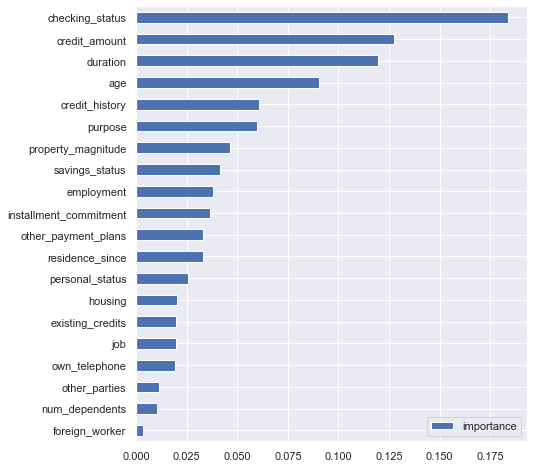

In [277]:
feature_imprt = pd.DataFrame({'importance': randomforest_model_best.feature_importances_},index=x_train.columns)

feature_imprt.sort_values(by='importance').plot.barh(figsize=(7,8),legend=True);